In [7]:
import os
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt


from tensorflow.keras import models, layers

from keras import Model
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_curve, auc, confusion_matrix, precision_recall_curve
from utils.utils import plot_line, plot_metrics, plot_confusion_matrix

In [2]:
data_dir = '..\dataset'
classes = ('REAL', 'FAKE')

In [180]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_images_32 = test_datagen.flow_from_directory(
    os.path.join(data_dir, 'test'),
    target_size=(32, 32),
    batch_size=32,
    class_mode='binary')

test_images_cat = test_datagen.flow_from_directory(
    os.path.join(data_dir, 'test'),
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical')

test_images_64 = test_datagen.flow_from_directory(
    os.path.join(data_dir, 'test'),
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

test_images_128 = test_datagen.flow_from_directory(
    os.path.join(data_dir, 'test'),
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [181]:
CNN_BASIC_TWO_CONV = load_model('../models/BASIC_CONV')
CNN_BASIC_THREE_CONV = load_model('../models/BASIC_CONV_3')
CNN_DILATED = load_model('../models/DILATED')
CNN_DILATED_NADAM = load_model('../models/DILATED_NADAM')
CNN_INCEPTION = load_model('../models/INCEPTION_MODULE')
CNN_INCEPTION_NADAM = load_model('../models/INCEPTION_MODULE_NADAM')
CNN_ALEXNET = load_model('../models/ALEXNET_MODEL')
CNN_ALEXNET_NADAM = load_model('../models/ALEXNET_MODEL_NADAM')
INCEPTION_RESNET = load_model('../models/INCEPTION_RESNET')
VGG19 = load_model('../models/VGG19')

In [182]:
y_true = [[],[],[],[],[],[],[],[],[],[]]
y_pred = [[],[],[],[],[],[],[],[],[],[]]
for batch_id in range(len(test_images_32)):
    print(f'BATCH {batch_id}')
    #IMAGE BATCHES
    batch_images_32 = test_images_32[batch_id][0]
    batch_labels_32 = test_images_32[batch_id][1]
    batch_images_cat = test_images_cat[batch_id][0]
    batch_labels_cat = test_images_cat[batch_id][1]
    batch_images_64 = test_images_64[batch_id][0]
    batch_labels_64 = test_images_64[batch_id][1]
    batch_images_128 = test_images_128[batch_id][0]
    batch_labels_128 = test_images_128[batch_id][1]
    
    #BATCH_PREDICTIONS
    BASIC_PRED_BAT = CNN_BASIC_TWO_CONV.predict(batch_images_32)
    BASIC_PRED_BAT2 = CNN_BASIC_THREE_CONV.predict(batch_images_32)
    DILATED_PRED_BAT = CNN_DILATED.predict(batch_images_64)
    DILATED_PRED_BAT2 = CNN_DILATED_NADAM.predict(batch_images_64)
    INCEPTION_PRED_BAT = CNN_INCEPTION.predict(batch_images_32)
    INCEPTION_PRED_BAT2 = CNN_INCEPTION_NADAM.predict(batch_images_32)
    ALEX_PRED_BAT = CNN_ALEXNET.predict(batch_images_64)
    ALEX_PRED_BAT2 = CNN_ALEXNET_NADAM.predict(batch_images_64)
    INC_RES_PRED_BAT = INCEPTION_RESNET.predict(batch_images_128)
    VGG_PRED_BAT = VGG19.predict(batch_images_cat)
    
    #PREDICTIONS
    BASIC_PRED_BAT = (BASIC_PRED_BAT > 0.5).astype(int)
    BASIC_PRED_BAT2 = (BASIC_PRED_BAT2 > 0.5).astype(int)
    DILATED_PRED_BAT = (DILATED_PRED_BAT > 0.5).astype(int)
    DILATED_PRED_BAT2 = (DILATED_PRED_BAT2 > 0.5).astype(int)
    INCEPTION_PRED_BAT = (INCEPTION_PRED_BAT > 0.5).astype(int)
    INCEPTION_PRED_BAT2 = (INCEPTION_PRED_BAT2 > 0.5).astype(int)
    ALEX_PRED_BAT = (ALEX_PRED_BAT > 0.5).astype(int)
    ALEX_PRED_BAT2 = (ALEX_PRED_BAT2 > 0.5).astype(int)
    INC_RES_PRED_BAT = (INC_RES_PRED_BAT > 0.5).astype(int)
    VGG_PRED_BAT = (VGG_PRED_BAT > 0.5).astype(int)
    
    y_true[0].extend(batch_labels_32)
    y_pred[0].extend(BASIC_PRED_BAT)
    
    y_true[1].extend(batch_labels_32)
    y_pred[1].extend(BASIC_PRED_BAT2)
    
    y_true[2].extend(batch_labels_64)
    y_pred[2].extend(DILATED_PRED_BAT)
    
    y_true[3].extend(batch_labels_64)
    y_pred[3].extend(DILATED_PRED_BAT2)
    
    y_true[4].extend(batch_labels_32)
    y_pred[4].extend(INCEPTION_PRED_BAT)
    
    y_true[5].extend(batch_labels_32)
    y_pred[5].extend(INCEPTION_PRED_BAT2)
    
    y_true[6].extend(batch_labels_64)
    y_pred[6].extend(ALEX_PRED_BAT)
    
    y_true[7].extend(batch_labels_64)
    y_pred[7].extend(ALEX_PRED_BAT2)
    
    y_true[8].extend(batch_labels_128)
    y_pred[8].extend(INC_RES_PRED_BAT)
    
    y_true[9].extend(batch_labels_cat)
    y_pred[9].extend(VGG_PRED_BAT)

BATCH 0
1/1 [==============================] - 0s 232ms/step
BATCH 1
1/1 [==============================] - 0s 92ms/step
BATCH 2
1/1 [==============================] - 0s 90ms/step
BATCH 3
1/1 [==============================] - 0s 89ms/step
BATCH 4
1/1 [==============================] - 0s 91ms/step
BATCH 5
1/1 [==============================] - 0s 93ms/step
BATCH 6
1/1 [==============================] - 0s 92ms/step
BATCH 7
1/1 [==============================] - 0s 85ms/step
BATCH 8
1/1 [==============================] - 0s 89ms/step
BATCH 9
1/1 [==============================] - 0s 91ms/step
BATCH 10
1/1 [==============================] - 0s 94ms/step
BATCH 11
1/1 [==============================] - 0s 91ms/step
BATCH 12
1/1 [==============================] - 0s 93ms/step
BATCH 13
1/1 [==============================] - 0s 94ms/step
BATCH 14
1/1 [==============================] - 0s 87ms/step
BATCH 15
1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 96ms/step
BATCH 16
1/1 [==============================] - 0s 93ms/step
BATCH 17
1/1 [==============================] - 0s 91ms/step
BATCH 18
1/1 [==============================] - 0s 93ms/step
BATCH 19
1/1 [==============================] - 0s 96ms/step
BATCH 20
1/1 [==============================] - 0s 96ms/step
BATCH 21
1/1 [==============================] - 0s 96ms/step
BATCH 22
1/1 [==============================] - 0s 93ms/step
BATCH 23
1/1 [==============================] - 0s 89ms/step
BATCH 24
1/1 [==============================] - 0s 94ms/step
BATCH 25
1/1 [==============================] - 0s 94ms/step
BATCH 26
1/1 [==============================] - 0s 97ms/step
BATCH 27
1/1 [==============================] - 0s 96ms/step
BATCH 28
1/1 [==============================] - 0s 91ms/step
BATCH 29
1/1 [==============================] - 0s 94ms/step
BATCH 30
1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 92ms/step
BATCH 31
1/1 [==============================] - 0s 96ms/step
BATCH 32
1/1 [==============================] - 0s 92ms/step
BATCH 33
1/1 [==============================] - 0s 92ms/step
BATCH 34
1/1 [==============================] - 0s 96ms/step
BATCH 35
1/1 [==============================] - 0s 106ms/step
BATCH 36
1/1 [==============================] - 0s 89ms/step
BATCH 37
1/1 [==============================] - 0s 93ms/step
BATCH 38
1/1 [==============================] - 0s 92ms/step
BATCH 39
1/1 [==============================] - 0s 98ms/step
BATCH 40
1/1 [==============================] - 0s 97ms/step
BATCH 41
1/1 [==============================] - 0s 90ms/step
BATCH 42
1/1 [==============================] - 0s 96ms/step
BATCH 43
1/1 [==============================] - 0s 93ms/step
BATCH 44
1/1 [==============================] - 0s 93ms/step
BATCH 45
1/1 [==============================] - 0s 97ms/step
BATCH 46
1/1 [==================

1/1 [==============================] - 0s 95ms/step
BATCH 47
1/1 [==============================] - 0s 93ms/step
BATCH 48
1/1 [==============================] - 0s 93ms/step
BATCH 49
1/1 [==============================] - 0s 98ms/step
BATCH 50
1/1 [==============================] - 0s 94ms/step
BATCH 51
1/1 [==============================] - 0s 99ms/step
BATCH 52
1/1 [==============================] - 0s 94ms/step
BATCH 53
1/1 [==============================] - 0s 99ms/step
BATCH 54
1/1 [==============================] - 0s 91ms/step
BATCH 55
1/1 [==============================] - 0s 97ms/step
BATCH 56
1/1 [==============================] - 0s 102ms/step
BATCH 57
1/1 [==============================] - 0s 99ms/step
BATCH 58
1/1 [==============================] - 0s 100ms/step
BATCH 59
1/1 [==============================] - 0s 95ms/step
BATCH 60
1/1 [==============================] - 0s 103ms/step
BATCH 61
1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 94ms/step
BATCH 62
1/1 [==============================] - 0s 94ms/step
BATCH 63
1/1 [==============================] - 0s 86ms/step
BATCH 64
1/1 [==============================] - 0s 85ms/step
BATCH 65
1/1 [==============================] - 0s 85ms/step
BATCH 66
1/1 [==============================] - 0s 88ms/step
BATCH 67
1/1 [==============================] - 0s 91ms/step
BATCH 68
1/1 [==============================] - 0s 92ms/step
BATCH 69
1/1 [==============================] - 0s 88ms/step
BATCH 70
1/1 [==============================] - 0s 88ms/step
BATCH 71
1/1 [==============================] - 0s 85ms/step
BATCH 72
1/1 [==============================] - 0s 84ms/step
BATCH 73
1/1 [==============================] - 0s 85ms/step
BATCH 74
1/1 [==============================] - 0s 87ms/step
BATCH 75
1/1 [==============================] - 0s 88ms/step
BATCH 76
1/1 [==============================] - 0s 88ms/step
BATCH 77


1/1 [==============================] - 0s 86ms/step
BATCH 78
1/1 [==============================] - 0s 90ms/step
BATCH 79
1/1 [==============================] - 0s 89ms/step
BATCH 80
1/1 [==============================] - 0s 88ms/step
BATCH 81
1/1 [==============================] - 0s 90ms/step
BATCH 82
1/1 [==============================] - 0s 92ms/step
BATCH 83
1/1 [==============================] - 0s 88ms/step
BATCH 84
1/1 [==============================] - 0s 90ms/step
BATCH 85
1/1 [==============================] - 0s 88ms/step
BATCH 86
1/1 [==============================] - 0s 86ms/step
BATCH 87
1/1 [==============================] - 0s 94ms/step
BATCH 88
1/1 [==============================] - 0s 87ms/step
BATCH 89
1/1 [==============================] - 0s 86ms/step
BATCH 90
1/1 [==============================] - 0s 89ms/step
BATCH 91
1/1 [==============================] - 0s 86ms/step
BATCH 92
1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 88ms/step
BATCH 93
1/1 [==============================] - 0s 92ms/step
BATCH 94
1/1 [==============================] - 0s 87ms/step
BATCH 95
1/1 [==============================] - 0s 94ms/step
BATCH 96
1/1 [==============================] - 0s 88ms/step
BATCH 97
1/1 [==============================] - 0s 92ms/step
BATCH 98
1/1 [==============================] - 0s 88ms/step
BATCH 99
1/1 [==============================] - 0s 89ms/step
BATCH 100
1/1 [==============================] - 0s 90ms/step
BATCH 101
1/1 [==============================] - 0s 93ms/step
BATCH 102
1/1 [==============================] - 0s 90ms/step
BATCH 103
1/1 [==============================] - 0s 92ms/step
BATCH 104
1/1 [==============================] - 0s 93ms/step
BATCH 105
1/1 [==============================] - 0s 91ms/step
BATCH 106
1/1 [==============================] - 0s 90ms/step
BATCH 107
1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 92ms/step
BATCH 108
1/1 [==============================] - 0s 96ms/step
BATCH 109
1/1 [==============================] - 0s 94ms/step
BATCH 110
1/1 [==============================] - 0s 90ms/step
BATCH 111
1/1 [==============================] - 0s 93ms/step
BATCH 112
1/1 [==============================] - 0s 100ms/step
BATCH 113
1/1 [==============================] - 0s 99ms/step
BATCH 114
1/1 [==============================] - 0s 95ms/step
BATCH 115
1/1 [==============================] - 0s 98ms/step
BATCH 116
1/1 [==============================] - 0s 94ms/step
BATCH 117
1/1 [==============================] - 0s 97ms/step
BATCH 118
1/1 [==============================] - 0s 99ms/step
BATCH 119
1/1 [==============================] - 0s 110ms/step
BATCH 120
1/1 [==============================] - 0s 110ms/step
BATCH 121
1/1 [==============================] - 0s 123ms/step
BATCH 122
1/1 [==============================] - 0s 115ms/step
BATCH 123
1/1

1/1 [==============================] - 0s 118ms/step
BATCH 124
1/1 [==============================] - 0s 121ms/step
BATCH 125
1/1 [==============================] - 0s 120ms/step
BATCH 126
1/1 [==============================] - 0s 124ms/step
BATCH 127
1/1 [==============================] - 0s 116ms/step
BATCH 128
1/1 [==============================] - 0s 116ms/step
BATCH 129
1/1 [==============================] - 0s 119ms/step
BATCH 130
1/1 [==============================] - 0s 121ms/step
BATCH 131
1/1 [==============================] - 0s 127ms/step
BATCH 132
1/1 [==============================] - 0s 119ms/step
BATCH 133
1/1 [==============================] - 0s 119ms/step
BATCH 134
1/1 [==============================] - 0s 117ms/step
BATCH 135
1/1 [==============================] - 0s 125ms/step
BATCH 136
1/1 [==============================] - 0s 126ms/step
BATCH 137
1/1 [==============================] - 0s 127ms/step
BATCH 138
1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 125ms/step
BATCH 139
1/1 [==============================] - 0s 125ms/step
BATCH 140
1/1 [==============================] - 0s 126ms/step
BATCH 141
1/1 [==============================] - 0s 128ms/step
BATCH 142
1/1 [==============================] - 0s 124ms/step
BATCH 143
1/1 [==============================] - 0s 124ms/step
BATCH 144
1/1 [==============================] - 0s 126ms/step
BATCH 145
1/1 [==============================] - 0s 124ms/step
BATCH 146
1/1 [==============================] - 0s 127ms/step
BATCH 147
1/1 [==============================] - 0s 127ms/step
BATCH 148
1/1 [==============================] - 0s 125ms/step
BATCH 149
1/1 [==============================] - 0s 123ms/step
BATCH 150
1/1 [==============================] - 0s 124ms/step
BATCH 151
1/1 [==============================] - 0s 128ms/step
BATCH 152
1/1 [==============================] - 0s 130ms/step
BATCH 153
1/1 [==============================] - 0s 127ms/step
BA

1/1 [==============================] - 0s 128ms/step
BATCH 155
1/1 [==============================] - 0s 123ms/step
BATCH 156
1/1 [==============================] - 0s 125ms/step
BATCH 157
1/1 [==============================] - 0s 125ms/step
BATCH 158
1/1 [==============================] - 0s 127ms/step
BATCH 159
1/1 [==============================] - 0s 123ms/step
BATCH 160
1/1 [==============================] - 0s 119ms/step
BATCH 161
1/1 [==============================] - 0s 121ms/step
BATCH 162
1/1 [==============================] - 0s 123ms/step
BATCH 163
1/1 [==============================] - 0s 125ms/step
BATCH 164
1/1 [==============================] - 0s 123ms/step
BATCH 165
1/1 [==============================] - 0s 125ms/step
BATCH 166
1/1 [==============================] - 0s 126ms/step
BATCH 167
1/1 [==============================] - 0s 127ms/step
BATCH 168
1/1 [==============================] - 0s 120ms/step
BATCH 169
1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 122ms/step
BATCH 170
1/1 [==============================] - 0s 123ms/step
BATCH 171
1/1 [==============================] - 0s 125ms/step
BATCH 172
1/1 [==============================] - 0s 120ms/step
BATCH 173
1/1 [==============================] - 0s 124ms/step
BATCH 174
1/1 [==============================] - 0s 124ms/step
BATCH 175
1/1 [==============================] - 0s 123ms/step
BATCH 176
1/1 [==============================] - 0s 123ms/step
BATCH 177
1/1 [==============================] - 0s 123ms/step
BATCH 178
1/1 [==============================] - 0s 119ms/step
BATCH 179
1/1 [==============================] - 0s 121ms/step
BATCH 180
1/1 [==============================] - 0s 122ms/step
BATCH 181
1/1 [==============================] - 0s 124ms/step
BATCH 182
1/1 [==============================] - 0s 128ms/step
BATCH 183
1/1 [==============================] - 0s 123ms/step
BATCH 184
1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 130ms/step
BATCH 185
1/1 [==============================] - 0s 123ms/step
BATCH 186
1/1 [==============================] - 0s 121ms/step
BATCH 187
1/1 [==============================] - 0s 127ms/step
BATCH 188
1/1 [==============================] - 0s 126ms/step
BATCH 189
1/1 [==============================] - 0s 125ms/step
BATCH 190
1/1 [==============================] - 0s 125ms/step
BATCH 191
1/1 [==============================] - 0s 124ms/step
BATCH 192
1/1 [==============================] - 0s 122ms/step
BATCH 193
1/1 [==============================] - 0s 129ms/step
BATCH 194
1/1 [==============================] - 0s 120ms/step
BATCH 195
1/1 [==============================] - 0s 125ms/step
BATCH 196
1/1 [==============================] - 0s 126ms/step
BATCH 197
1/1 [==============================] - 0s 122ms/step
BATCH 198
1/1 [==============================] - 0s 126ms/step
BATCH 199
1/1 [==============================] - 0s 125ms/step
BA

1/1 [==============================] - 0s 125ms/step
BATCH 201
1/1 [==============================] - 0s 122ms/step
BATCH 202
1/1 [==============================] - 0s 120ms/step
BATCH 203
1/1 [==============================] - 0s 119ms/step
BATCH 204
1/1 [==============================] - 0s 124ms/step
BATCH 205
1/1 [==============================] - 0s 119ms/step
BATCH 206
1/1 [==============================] - 0s 127ms/step
BATCH 207
1/1 [==============================] - 0s 124ms/step
BATCH 208
1/1 [==============================] - 0s 123ms/step
BATCH 209
1/1 [==============================] - 0s 128ms/step
BATCH 210
1/1 [==============================] - 0s 118ms/step
BATCH 211
1/1 [==============================] - 0s 122ms/step
BATCH 212
1/1 [==============================] - 0s 124ms/step
BATCH 213
1/1 [==============================] - 0s 123ms/step
BATCH 214
1/1 [==============================] - 0s 117ms/step
BATCH 215
1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 119ms/step
BATCH 216
1/1 [==============================] - 0s 117ms/step
BATCH 217
1/1 [==============================] - 0s 123ms/step
BATCH 218
1/1 [==============================] - 0s 125ms/step
BATCH 219
1/1 [==============================] - 0s 120ms/step
BATCH 220
1/1 [==============================] - 0s 123ms/step
BATCH 221
1/1 [==============================] - 0s 124ms/step
BATCH 222
1/1 [==============================] - 0s 115ms/step
BATCH 223
1/1 [==============================] - 0s 128ms/step
BATCH 224
1/1 [==============================] - 0s 128ms/step
BATCH 225
1/1 [==============================] - 0s 124ms/step
BATCH 226
1/1 [==============================] - 0s 125ms/step
BATCH 227
1/1 [==============================] - 0s 126ms/step
BATCH 228
1/1 [==============================] - 0s 131ms/step
BATCH 229
1/1 [==============================] - 0s 122ms/step
BATCH 230
1/1 [==============================] - 0s 443ms/step


1/1 [==============================] - 0s 124ms/step
BATCH 231
1/1 [==============================] - 0s 127ms/step
BATCH 232
1/1 [==============================] - 0s 129ms/step
BATCH 233
1/1 [==============================] - 0s 126ms/step
BATCH 234
1/1 [==============================] - 0s 127ms/step
BATCH 235
1/1 [==============================] - 0s 128ms/step
BATCH 236
1/1 [==============================] - 0s 126ms/step
BATCH 237
1/1 [==============================] - 0s 126ms/step
BATCH 238
1/1 [==============================] - 0s 126ms/step
BATCH 239
1/1 [==============================] - 0s 128ms/step
BATCH 240
1/1 [==============================] - 0s 130ms/step
BATCH 241
1/1 [==============================] - 0s 129ms/step
BATCH 242
1/1 [==============================] - 0s 119ms/step
BATCH 243
1/1 [==============================] - 0s 127ms/step
BATCH 244
1/1 [==============================] - 0s 125ms/step
BATCH 245
1/1 [==============================] - 0s 125ms/step
BA

1/1 [==============================] - 0s 123ms/step
BATCH 247
1/1 [==============================] - 0s 121ms/step
BATCH 248
1/1 [==============================] - 0s 125ms/step
BATCH 249
1/1 [==============================] - 0s 126ms/step
BATCH 250
1/1 [==============================] - 0s 126ms/step
BATCH 251
1/1 [==============================] - 0s 124ms/step
BATCH 252
1/1 [==============================] - 0s 125ms/step
BATCH 253
1/1 [==============================] - 0s 123ms/step
BATCH 254
1/1 [==============================] - 0s 123ms/step
BATCH 255
1/1 [==============================] - 0s 121ms/step
BATCH 256
1/1 [==============================] - 0s 126ms/step
BATCH 257
1/1 [==============================] - 0s 123ms/step
BATCH 258
1/1 [==============================] - 0s 125ms/step
BATCH 259
1/1 [==============================] - 0s 119ms/step
BATCH 260
1/1 [==============================] - 0s 125ms/step
BATCH 261
1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 127ms/step
BATCH 262
1/1 [==============================] - 0s 126ms/step
BATCH 263
1/1 [==============================] - 0s 122ms/step
BATCH 264
1/1 [==============================] - 0s 123ms/step
BATCH 265
1/1 [==============================] - 0s 120ms/step
BATCH 266
1/1 [==============================] - 0s 121ms/step
BATCH 267
1/1 [==============================] - 0s 130ms/step
BATCH 268
1/1 [==============================] - 0s 115ms/step
BATCH 269
1/1 [==============================] - 0s 127ms/step
BATCH 270
1/1 [==============================] - 0s 118ms/step
BATCH 271
1/1 [==============================] - 0s 122ms/step
BATCH 272
1/1 [==============================] - 0s 125ms/step
BATCH 273
1/1 [==============================] - 0s 113ms/step
BATCH 274
1/1 [==============================] - 0s 127ms/step
BATCH 275
1/1 [==============================] - 0s 124ms/step
BATCH 276
1/1 [==============================] - 0s 125ms/step
BA

1/1 [==============================] - 0s 124ms/step
BATCH 278
1/1 [==============================] - 0s 123ms/step
BATCH 279
1/1 [==============================] - 0s 124ms/step
BATCH 280
1/1 [==============================] - 0s 125ms/step
BATCH 281
1/1 [==============================] - 0s 120ms/step
BATCH 282
1/1 [==============================] - 0s 121ms/step
BATCH 283
1/1 [==============================] - 0s 121ms/step
BATCH 284
1/1 [==============================] - 0s 123ms/step
BATCH 285
1/1 [==============================] - 0s 121ms/step
BATCH 286
1/1 [==============================] - 0s 123ms/step
BATCH 287
1/1 [==============================] - 0s 126ms/step
BATCH 288
1/1 [==============================] - 0s 118ms/step
BATCH 289
1/1 [==============================] - 0s 118ms/step
BATCH 290
1/1 [==============================] - 0s 125ms/step
BATCH 291
1/1 [==============================] - 0s 123ms/step
BATCH 292
1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 124ms/step
BATCH 293
1/1 [==============================] - 0s 120ms/step
BATCH 294
1/1 [==============================] - 0s 117ms/step
BATCH 295
1/1 [==============================] - 0s 123ms/step
BATCH 296
1/1 [==============================] - 0s 127ms/step
BATCH 297
1/1 [==============================] - 0s 122ms/step
BATCH 298
1/1 [==============================] - 0s 126ms/step
BATCH 299
1/1 [==============================] - 0s 123ms/step
BATCH 300
1/1 [==============================] - 0s 124ms/step
BATCH 301
1/1 [==============================] - 0s 121ms/step
BATCH 302
1/1 [==============================] - 0s 118ms/step
BATCH 303
1/1 [==============================] - 0s 117ms/step
BATCH 304
1/1 [==============================] - 0s 125ms/step
BATCH 305
1/1 [==============================] - 0s 123ms/step
BATCH 306
1/1 [==============================] - 0s 125ms/step
BATCH 307
1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 138ms/step
BATCH 308
1/1 [==============================] - 0s 119ms/step
BATCH 309
1/1 [==============================] - 0s 124ms/step
BATCH 310
1/1 [==============================] - 0s 122ms/step
BATCH 311
1/1 [==============================] - 0s 125ms/step
BATCH 312
1/1 [==============================] - 0s 116ms/step
BATCH 313
1/1 [==============================] - 0s 128ms/step
BATCH 314
1/1 [==============================] - 0s 122ms/step
BATCH 315
1/1 [==============================] - 0s 133ms/step
BATCH 316
1/1 [==============================] - 0s 127ms/step
BATCH 317
1/1 [==============================] - 0s 131ms/step
BATCH 318
1/1 [==============================] - 0s 124ms/step
BATCH 319
1/1 [==============================] - 0s 131ms/step
BATCH 320
1/1 [==============================] - 0s 124ms/step
BATCH 321
1/1 [==============================] - 0s 126ms/step
BATCH 322
1/1 [==============================] - 0s 128ms/step
BA

1/1 [==============================] - 0s 141ms/step
BATCH 324
1/1 [==============================] - 0s 128ms/step
BATCH 325
1/1 [==============================] - 0s 128ms/step
BATCH 326
1/1 [==============================] - 0s 132ms/step
BATCH 327
1/1 [==============================] - 0s 129ms/step
BATCH 328
1/1 [==============================] - 0s 126ms/step
BATCH 329
1/1 [==============================] - 0s 130ms/step
BATCH 330
1/1 [==============================] - 0s 134ms/step
BATCH 331
1/1 [==============================] - 0s 123ms/step
BATCH 332
1/1 [==============================] - 0s 129ms/step
BATCH 333
1/1 [==============================] - 0s 128ms/step
BATCH 334
1/1 [==============================] - 0s 129ms/step
BATCH 335
1/1 [==============================] - 0s 130ms/step
BATCH 336
1/1 [==============================] - 0s 125ms/step
BATCH 337
1/1 [==============================] - 0s 132ms/step
BATCH 338
1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 131ms/step
BATCH 339
1/1 [==============================] - 0s 128ms/step
BATCH 340
1/1 [==============================] - 0s 130ms/step
BATCH 341
1/1 [==============================] - 0s 130ms/step
BATCH 342
1/1 [==============================] - 0s 131ms/step
BATCH 343
1/1 [==============================] - 0s 131ms/step
BATCH 344
1/1 [==============================] - 0s 127ms/step
BATCH 345
1/1 [==============================] - 0s 128ms/step
BATCH 346
1/1 [==============================] - 0s 131ms/step
BATCH 347
1/1 [==============================] - 0s 127ms/step
BATCH 348
1/1 [==============================] - 0s 130ms/step
BATCH 349
1/1 [==============================] - 0s 130ms/step
BATCH 350
1/1 [==============================] - 0s 129ms/step
BATCH 351
1/1 [==============================] - 0s 128ms/step
BATCH 352
1/1 [==============================] - 0s 128ms/step
BATCH 353
1/1 [==============================] - 0s 463ms/step


1/1 [==============================] - 0s 133ms/step
BATCH 354
1/1 [==============================] - 0s 126ms/step
BATCH 355
1/1 [==============================] - 0s 129ms/step
BATCH 356
1/1 [==============================] - 0s 120ms/step
BATCH 357
1/1 [==============================] - 0s 118ms/step
BATCH 358
1/1 [==============================] - 0s 122ms/step
BATCH 359
1/1 [==============================] - 0s 123ms/step
BATCH 360
1/1 [==============================] - 0s 122ms/step
BATCH 361
1/1 [==============================] - 0s 122ms/step
BATCH 362
1/1 [==============================] - 0s 120ms/step
BATCH 363
1/1 [==============================] - 0s 120ms/step
BATCH 364
1/1 [==============================] - 0s 122ms/step
BATCH 365
1/1 [==============================] - 0s 124ms/step
BATCH 366
1/1 [==============================] - 0s 117ms/step
BATCH 367
1/1 [==============================] - 0s 125ms/step
BATCH 368
1/1 [==============================] - 0s 122ms/step
BA

1/1 [==============================] - 0s 123ms/step
BATCH 370
1/1 [==============================] - 0s 119ms/step
BATCH 371
1/1 [==============================] - 0s 121ms/step
BATCH 372
1/1 [==============================] - 0s 124ms/step
BATCH 373
1/1 [==============================] - 0s 123ms/step
BATCH 374
1/1 [==============================] - 0s 125ms/step
BATCH 375
1/1 [==============================] - 0s 119ms/step
BATCH 376
1/1 [==============================] - 0s 119ms/step
BATCH 377
1/1 [==============================] - 0s 126ms/step
BATCH 378
1/1 [==============================] - 0s 121ms/step
BATCH 379
1/1 [==============================] - 0s 121ms/step
BATCH 380
1/1 [==============================] - 0s 118ms/step
BATCH 381
1/1 [==============================] - 0s 121ms/step
BATCH 382
1/1 [==============================] - 0s 125ms/step
BATCH 383
1/1 [==============================] - 0s 118ms/step
BATCH 384
1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 123ms/step
BATCH 385
1/1 [==============================] - 0s 113ms/step
BATCH 386
1/1 [==============================] - 0s 121ms/step
BATCH 387
1/1 [==============================] - 0s 122ms/step
BATCH 388
1/1 [==============================] - 0s 123ms/step
BATCH 389
1/1 [==============================] - 0s 124ms/step
BATCH 390
1/1 [==============================] - 0s 124ms/step
BATCH 391
1/1 [==============================] - 0s 118ms/step
BATCH 392
1/1 [==============================] - 0s 120ms/step
BATCH 393
1/1 [==============================] - 0s 127ms/step
BATCH 394
1/1 [==============================] - 0s 115ms/step
BATCH 395
1/1 [==============================] - 0s 123ms/step
BATCH 396
1/1 [==============================] - 0s 121ms/step
BATCH 397
1/1 [==============================] - 0s 121ms/step
BATCH 398
1/1 [==============================] - 0s 121ms/step
BATCH 399
1/1 [==============================] - 0s 123ms/step
BA

1/1 [==============================] - 0s 115ms/step
BATCH 401
1/1 [==============================] - 0s 127ms/step
BATCH 402
1/1 [==============================] - 0s 125ms/step
BATCH 403
1/1 [==============================] - 0s 120ms/step
BATCH 404
1/1 [==============================] - 0s 122ms/step
BATCH 405
1/1 [==============================] - 0s 126ms/step
BATCH 406
1/1 [==============================] - 0s 129ms/step
BATCH 407
1/1 [==============================] - 0s 131ms/step
BATCH 408
1/1 [==============================] - 0s 119ms/step
BATCH 409
1/1 [==============================] - 0s 131ms/step
BATCH 410
1/1 [==============================] - 0s 127ms/step
BATCH 411
1/1 [==============================] - 0s 127ms/step
BATCH 412
1/1 [==============================] - 0s 128ms/step
BATCH 413
1/1 [==============================] - 0s 119ms/step
BATCH 414
1/1 [==============================] - 0s 125ms/step
BATCH 415
1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 126ms/step
BATCH 416
1/1 [==============================] - 0s 120ms/step
BATCH 417
1/1 [==============================] - 0s 131ms/step
BATCH 418
1/1 [==============================] - 0s 123ms/step
BATCH 419
1/1 [==============================] - 0s 125ms/step
BATCH 420
1/1 [==============================] - 0s 124ms/step
BATCH 421
1/1 [==============================] - 0s 130ms/step
BATCH 422
1/1 [==============================] - 0s 128ms/step
BATCH 423
1/1 [==============================] - 0s 125ms/step
BATCH 424
1/1 [==============================] - 0s 131ms/step
BATCH 425
1/1 [==============================] - 0s 128ms/step
BATCH 426
1/1 [==============================] - 0s 126ms/step
BATCH 427
1/1 [==============================] - 0s 125ms/step
BATCH 428
1/1 [==============================] - 0s 116ms/step
BATCH 429
1/1 [==============================] - 0s 130ms/step
BATCH 430
1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 123ms/step
BATCH 431
1/1 [==============================] - 0s 132ms/step
BATCH 432
1/1 [==============================] - 0s 128ms/step
BATCH 433
1/1 [==============================] - 0s 123ms/step
BATCH 434
1/1 [==============================] - 0s 125ms/step
BATCH 435
1/1 [==============================] - 0s 128ms/step
BATCH 436
1/1 [==============================] - 0s 125ms/step
BATCH 437
1/1 [==============================] - 0s 128ms/step
BATCH 438
1/1 [==============================] - 0s 118ms/step
BATCH 439
1/1 [==============================] - 0s 127ms/step
BATCH 440
1/1 [==============================] - 0s 123ms/step
BATCH 441
1/1 [==============================] - 0s 134ms/step
BATCH 442
1/1 [==============================] - 0s 127ms/step
BATCH 443
1/1 [==============================] - 0s 124ms/step
BATCH 444
1/1 [==============================] - 0s 130ms/step
BATCH 445
1/1 [==============================] - 0s 124ms/step
BA

1/1 [==============================] - 0s 125ms/step
BATCH 447
1/1 [==============================] - 0s 141ms/step
BATCH 448
1/1 [==============================] - 0s 129ms/step
BATCH 449
1/1 [==============================] - 0s 124ms/step
BATCH 450
1/1 [==============================] - 0s 126ms/step
BATCH 451
1/1 [==============================] - 0s 121ms/step
BATCH 452
1/1 [==============================] - 0s 115ms/step
BATCH 453
1/1 [==============================] - 0s 116ms/step
BATCH 454
1/1 [==============================] - 0s 111ms/step
BATCH 455
1/1 [==============================] - 0s 114ms/step
BATCH 456
1/1 [==============================] - 0s 121ms/step
BATCH 457
1/1 [==============================] - 0s 121ms/step
BATCH 458
1/1 [==============================] - 0s 124ms/step
BATCH 459
1/1 [==============================] - 0s 120ms/step
BATCH 460
1/1 [==============================] - 0s 124ms/step
BATCH 461
1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 129ms/step
BATCH 462
1/1 [==============================] - 0s 127ms/step
BATCH 463
1/1 [==============================] - 0s 123ms/step
BATCH 464
1/1 [==============================] - 0s 124ms/step
BATCH 465
1/1 [==============================] - 0s 127ms/step
BATCH 466
1/1 [==============================] - 0s 127ms/step
BATCH 467
1/1 [==============================] - 0s 127ms/step
BATCH 468
1/1 [==============================] - 0s 125ms/step
BATCH 469
1/1 [==============================] - 0s 123ms/step
BATCH 470
1/1 [==============================] - 0s 125ms/step
BATCH 471
1/1 [==============================] - 0s 121ms/step
BATCH 472
1/1 [==============================] - 0s 118ms/step
BATCH 473
1/1 [==============================] - 0s 126ms/step
BATCH 474
1/1 [==============================] - 0s 120ms/step
BATCH 475
1/1 [==============================] - 0s 125ms/step
BATCH 476
1/1 [==============================] - 0s 450ms/step


1/1 [==============================] - 0s 123ms/step
BATCH 477
1/1 [==============================] - 0s 128ms/step
BATCH 478
1/1 [==============================] - 0s 128ms/step
BATCH 479
1/1 [==============================] - 0s 119ms/step
BATCH 480
1/1 [==============================] - 0s 122ms/step
BATCH 481
1/1 [==============================] - 0s 127ms/step
BATCH 482
1/1 [==============================] - 0s 122ms/step
BATCH 483
1/1 [==============================] - 0s 126ms/step
BATCH 484
1/1 [==============================] - 0s 128ms/step
BATCH 485
1/1 [==============================] - 0s 119ms/step
BATCH 486
1/1 [==============================] - 0s 129ms/step
BATCH 487
1/1 [==============================] - 0s 121ms/step
BATCH 488
1/1 [==============================] - 0s 123ms/step
BATCH 489
1/1 [==============================] - 0s 124ms/step
BATCH 490
1/1 [==============================] - 0s 125ms/step
BATCH 491
1/1 [==============================] - 0s 120ms/step
BA

1/1 [==============================] - 0s 118ms/step
BATCH 493
1/1 [==============================] - 0s 121ms/step
BATCH 494
1/1 [==============================] - 0s 123ms/step
BATCH 495
1/1 [==============================] - 0s 123ms/step
BATCH 496
1/1 [==============================] - 0s 123ms/step
BATCH 497
1/1 [==============================] - 0s 130ms/step
BATCH 498
1/1 [==============================] - 0s 124ms/step
BATCH 499
1/1 [==============================] - 0s 125ms/step
BATCH 500
1/1 [==============================] - 0s 128ms/step
BATCH 501
1/1 [==============================] - 0s 135ms/step
BATCH 502
1/1 [==============================] - 0s 114ms/step
BATCH 503
1/1 [==============================] - 0s 125ms/step
BATCH 504
1/1 [==============================] - 0s 127ms/step
BATCH 505
1/1 [==============================] - 0s 124ms/step
BATCH 506
1/1 [==============================] - 0s 125ms/step
BATCH 507
1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 128ms/step
BATCH 508
1/1 [==============================] - 0s 127ms/step
BATCH 509
1/1 [==============================] - 0s 128ms/step
BATCH 510
1/1 [==============================] - 0s 123ms/step
BATCH 511
1/1 [==============================] - 0s 122ms/step
BATCH 512
1/1 [==============================] - 0s 134ms/step
BATCH 513
1/1 [==============================] - 0s 129ms/step
BATCH 514
1/1 [==============================] - 0s 124ms/step
BATCH 515
1/1 [==============================] - 0s 126ms/step
BATCH 516
1/1 [==============================] - 0s 125ms/step
BATCH 517
1/1 [==============================] - 0s 132ms/step
BATCH 518
1/1 [==============================] - 0s 132ms/step
BATCH 519
1/1 [==============================] - 0s 131ms/step
BATCH 520
1/1 [==============================] - 0s 133ms/step
BATCH 521
1/1 [==============================] - 0s 131ms/step
BATCH 522
1/1 [==============================] - 0s 130ms/step
BA

1/1 [==============================] - 0s 119ms/step
BATCH 524
1/1 [==============================] - 0s 125ms/step
BATCH 525
1/1 [==============================] - 0s 127ms/step
BATCH 526
1/1 [==============================] - 0s 137ms/step
BATCH 527
1/1 [==============================] - 0s 125ms/step
BATCH 528
1/1 [==============================] - 0s 130ms/step
BATCH 529
1/1 [==============================] - 0s 132ms/step
BATCH 530
1/1 [==============================] - 0s 127ms/step
BATCH 531
1/1 [==============================] - 0s 137ms/step
BATCH 532
1/1 [==============================] - 0s 133ms/step
BATCH 533
1/1 [==============================] - 0s 129ms/step
BATCH 534
1/1 [==============================] - 0s 126ms/step
BATCH 535
1/1 [==============================] - 0s 131ms/step
BATCH 536
1/1 [==============================] - 0s 130ms/step
BATCH 537
1/1 [==============================] - 0s 134ms/step
BATCH 538
1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 131ms/step
BATCH 539
1/1 [==============================] - 0s 126ms/step
BATCH 540
1/1 [==============================] - 0s 130ms/step
BATCH 541
1/1 [==============================] - 0s 129ms/step
BATCH 542
1/1 [==============================] - 0s 132ms/step
BATCH 543
1/1 [==============================] - 0s 129ms/step
BATCH 544
1/1 [==============================] - 0s 129ms/step
BATCH 545
1/1 [==============================] - 0s 132ms/step
BATCH 546
1/1 [==============================] - 0s 129ms/step
BATCH 547
1/1 [==============================] - 0s 127ms/step
BATCH 548
1/1 [==============================] - 0s 126ms/step
BATCH 549
1/1 [==============================] - 0s 127ms/step
BATCH 550
1/1 [==============================] - 0s 127ms/step
BATCH 551
1/1 [==============================] - 0s 133ms/step
BATCH 552
1/1 [==============================] - 0s 123ms/step
BATCH 553
1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 121ms/step
BATCH 554
1/1 [==============================] - 0s 123ms/step
BATCH 555
1/1 [==============================] - 0s 131ms/step
BATCH 556
1/1 [==============================] - 0s 131ms/step
BATCH 557
1/1 [==============================] - 0s 125ms/step
BATCH 558
1/1 [==============================] - 0s 130ms/step
BATCH 559
1/1 [==============================] - 0s 127ms/step
BATCH 560
1/1 [==============================] - 0s 121ms/step
BATCH 561
1/1 [==============================] - 0s 129ms/step
BATCH 562
1/1 [==============================] - 0s 127ms/step
BATCH 563
1/1 [==============================] - 0s 126ms/step
BATCH 564
1/1 [==============================] - 0s 120ms/step
BATCH 565
1/1 [==============================] - 0s 128ms/step
BATCH 566
1/1 [==============================] - 0s 124ms/step
BATCH 567
1/1 [==============================] - 0s 123ms/step
BATCH 568
1/1 [==============================] - 0s 125ms/step
BA

1/1 [==============================] - 0s 132ms/step
BATCH 570
1/1 [==============================] - 0s 127ms/step
BATCH 571
1/1 [==============================] - 0s 126ms/step
BATCH 572
1/1 [==============================] - 0s 124ms/step
BATCH 573
1/1 [==============================] - 0s 130ms/step
BATCH 574
1/1 [==============================] - 0s 127ms/step
BATCH 575
1/1 [==============================] - 0s 124ms/step
BATCH 576
1/1 [==============================] - 0s 131ms/step
BATCH 577
1/1 [==============================] - 0s 129ms/step
BATCH 578
1/1 [==============================] - 0s 125ms/step
BATCH 579
1/1 [==============================] - 0s 124ms/step
BATCH 580
1/1 [==============================] - 0s 123ms/step
BATCH 581
1/1 [==============================] - 0s 125ms/step
BATCH 582
1/1 [==============================] - 0s 123ms/step
BATCH 583
1/1 [==============================] - 0s 124ms/step
BATCH 584
1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 122ms/step
BATCH 585
1/1 [==============================] - 0s 123ms/step
BATCH 586
1/1 [==============================] - 0s 125ms/step
BATCH 587
1/1 [==============================] - 0s 123ms/step
BATCH 588
1/1 [==============================] - 0s 124ms/step
BATCH 589
1/1 [==============================] - 0s 129ms/step
BATCH 590
1/1 [==============================] - 0s 121ms/step
BATCH 591
1/1 [==============================] - 0s 130ms/step
BATCH 592
1/1 [==============================] - 0s 122ms/step
BATCH 593
1/1 [==============================] - 0s 121ms/step
BATCH 594
1/1 [==============================] - 0s 125ms/step
BATCH 595
1/1 [==============================] - 0s 128ms/step
BATCH 596
1/1 [==============================] - 0s 129ms/step
BATCH 597
1/1 [==============================] - 0s 126ms/step
BATCH 598
1/1 [==============================] - 0s 127ms/step
BATCH 599
1/1 [==============================] - 0s 462ms/step


1/1 [==============================] - 0s 123ms/step
BATCH 600
1/1 [==============================] - 0s 126ms/step
BATCH 601
1/1 [==============================] - 0s 121ms/step
BATCH 602
1/1 [==============================] - 0s 128ms/step
BATCH 603
1/1 [==============================] - 0s 124ms/step
BATCH 604
1/1 [==============================] - 0s 124ms/step
BATCH 605
1/1 [==============================] - 0s 125ms/step
BATCH 606
1/1 [==============================] - 0s 121ms/step
BATCH 607
1/1 [==============================] - 0s 126ms/step
BATCH 608
1/1 [==============================] - 0s 125ms/step
BATCH 609
1/1 [==============================] - 0s 120ms/step
BATCH 610
1/1 [==============================] - 0s 126ms/step
BATCH 611
1/1 [==============================] - 0s 123ms/step
BATCH 612
1/1 [==============================] - 0s 128ms/step
BATCH 613
1/1 [==============================] - 0s 124ms/step
BATCH 614
1/1 [==============================] - 0s 119ms/step
BA

1/1 [==============================] - 0s 126ms/step
BATCH 616
1/1 [==============================] - 0s 124ms/step
BATCH 617
1/1 [==============================] - 0s 128ms/step
BATCH 618
1/1 [==============================] - 0s 128ms/step
BATCH 619
1/1 [==============================] - 0s 122ms/step
BATCH 620
1/1 [==============================] - 0s 128ms/step
BATCH 621
1/1 [==============================] - 0s 123ms/step
BATCH 622
1/1 [==============================] - 0s 127ms/step
BATCH 623
1/1 [==============================] - 0s 128ms/step
BATCH 624
1/1 [==============================] - 0s 125ms/step


In [192]:
model_list = ['Two Convolutional Layers', 'Three Convolutional Layers','Dilated Convolution', 'Dilated Convolution with Nadam', 'Inception Module','Inception Module with Nadam', 'Alexnet', 'Alexnet with Nadam','Inception Resnet','VGG19']

In [193]:
ml = [t.replace(' ','\n') for t in model_list]

In [218]:
f1_scores = []
precision_scores = []
recall_scores = []
for pred, true in zip(y_pred, y_true):
    pred = [np.argmax(p) if p.shape[0] == 2 else p[0] for p in pred]
    true = [t if np.float32 == type(t) else np.argmax(t) for t in true]
    
    f1_scores.append(f1_score(true, pred)*100)
    precision_scores.append(precision_score(true, pred)*100)
    recall_scores.append(recall_score(true, pred)*100)

In [219]:
data = {
    'Models': ml,
    'F1 Score': f1_scores,
    'Precision': precision_scores,
    'Recall': recall_scores
}

In [220]:
df = pd.DataFrame(data)

C:\Users\uajhi\AppData\Local\Temp\ipykernel_17972\1466737187.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x="Models", y="value", hue="Metric", data=df.melt('Models', var_name='Metric', value_name='value'), ci=None)


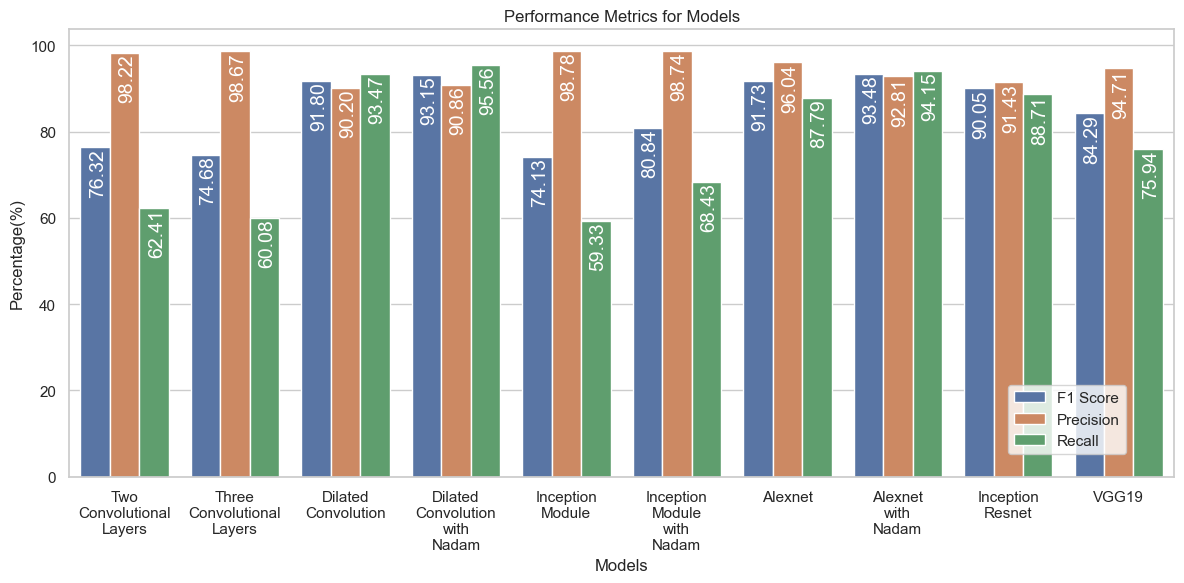

In [226]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="Models", y="value", hue="Metric", data=df.melt('Models', var_name='Metric', value_name='value'), ci=None)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(2, -18), textcoords='offset points', rotation=90,  fontsize=14, color='white')
plt.title('Performance Metrics for Models')
plt.xlabel('Models')
plt.ylabel('Percentage(%)')
plt.legend(bbox_to_anchor=(.85, .05), loc='lower left', borderaxespad=0.)

plt.tight_layout()
plt.show()

In [228]:
num_models = len(model_list)
num_rows = 2
num_cols = int(np.ceil(num_models / num_rows))



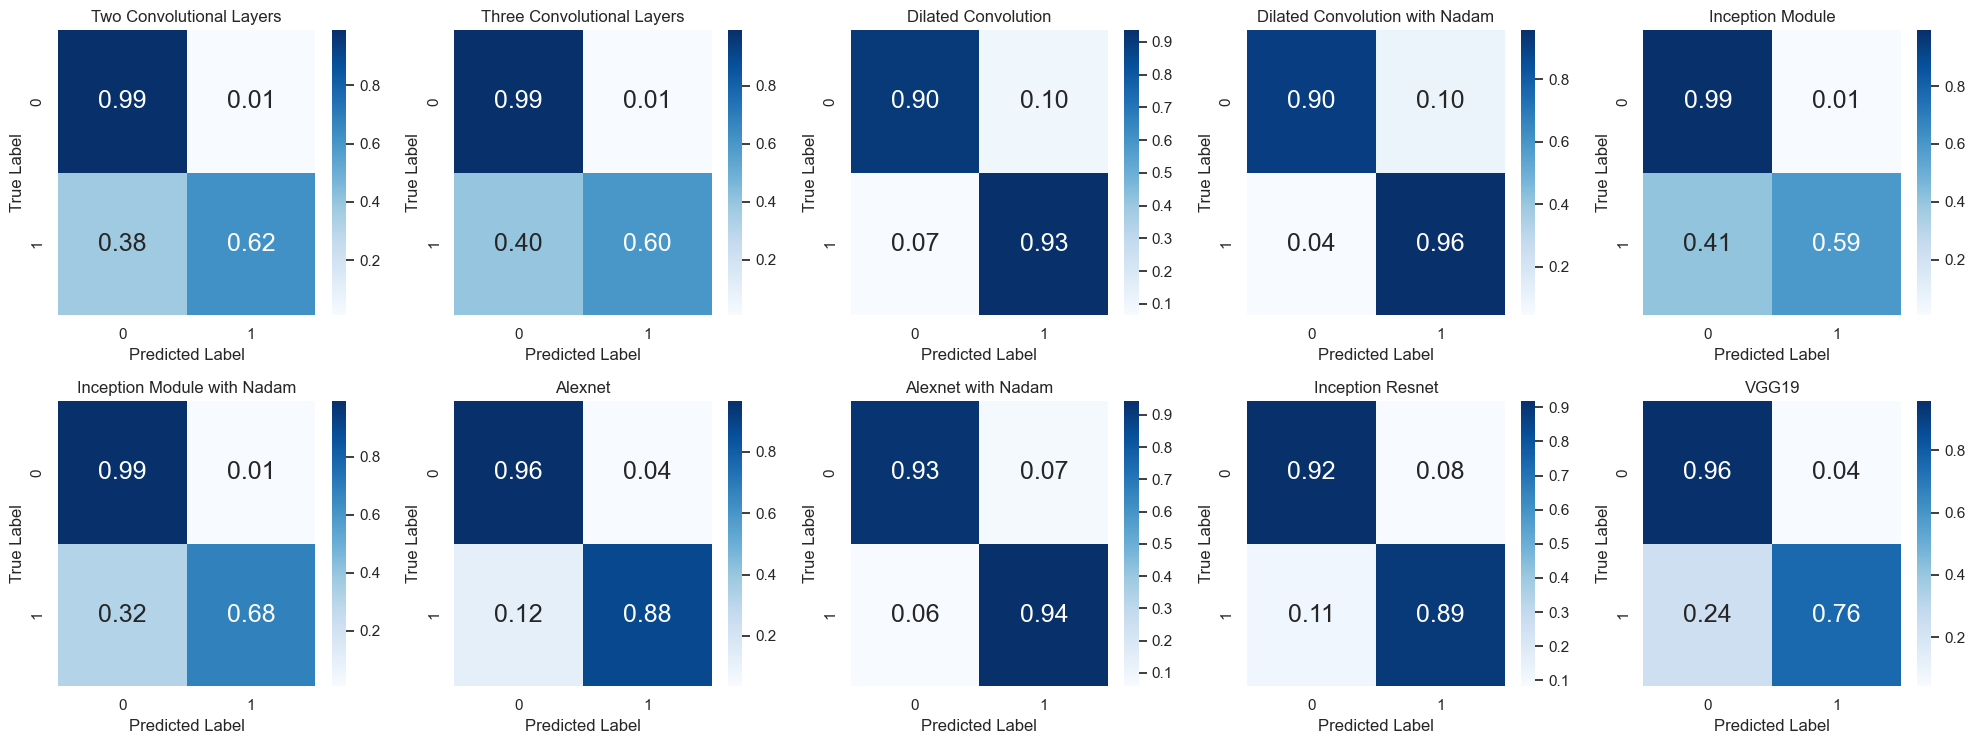

In [233]:
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 8))
for i in range(num_models):
    row = i // num_cols
    col = i % num_cols
    
    model_name = model_list[i]
    y_pred_model = [np.argmax(p) if p.shape[0] == 2 else p[0] for p in y_pred[i]]
    y_true_model = [t if np.float32 == type(t) else np.argmax(t) for t in y_true[i]]

    cm = confusion_matrix(y_true_model, y_pred_model)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap='Blues',annot_kws={"fontsize": 18}, ax=axes[row, col])
    axes[row, col].set_title(f'{model_name}')
    axes[row, col].set_xlabel('Predicted Label')
    axes[row, col].set_ylabel('True Label')

if num_models % num_cols != 0:
    for j in range(num_models % num_cols, num_cols):
        fig.delaxes(axes[num_rows-1, j])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [158]:
num_models = len(model_list)
num_rows = 1
num_cols = 2

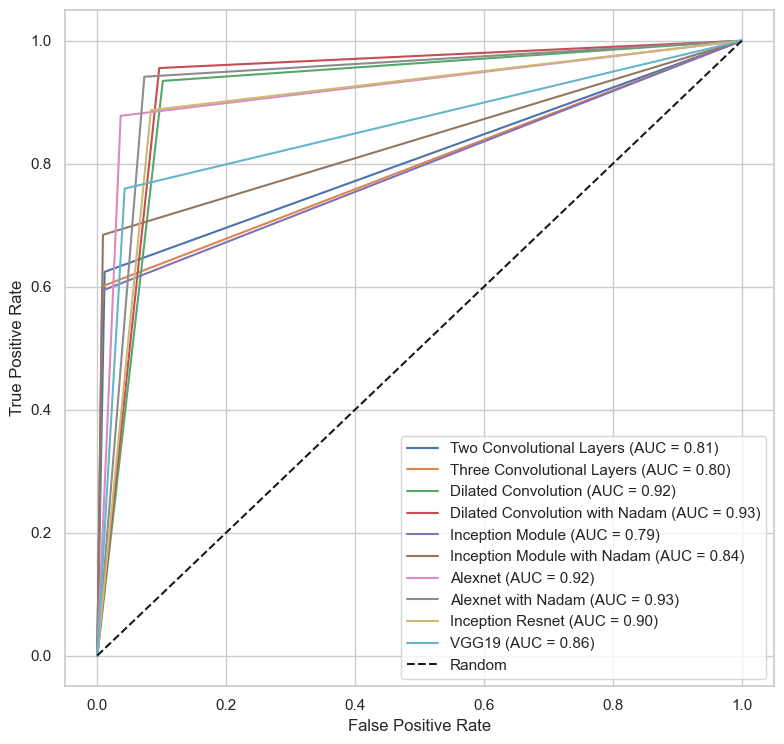

In [234]:
fig = plt.figure(figsize=(8, 8))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

for i in range(num_models):
    model_name = model_list[i]
    y_pred_model = [np.argmax(p) if p.shape[0] == 2 else p[0] for p in y_pred[i]]
    y_true_model = [t if np.float32 == type(t) else np.argmax(t) for t in y_true[i]]

    fpr, tpr, _ = roc_curve(y_true_model, y_pred_model)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.legend(loc='lower right')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [179]:
loss1, accuracy1 = CNN_BASIC_TWO_CONV.evaluate(test_images_32)
loss2, accuracy2 = CNN_BASIC_THREE_CONV.evaluate(test_images_32)
loss3, accuracy3 = CNN_DILATED.evaluate(test_images_64)
loss4, accuracy4 = CNN_DILATED_NADAM.evaluate(test_images_64)
loss5, accuracy5 = CNN_INCEPTION.evaluate(test_images_32)
loss6, accuracy6 = CNN_INCEPTION_NADAM.evaluate(test_images_32)
loss7, accuracy7 = CNN_ALEXNET.evaluate(test_images_64)
loss8, accuracy8 = CNN_ALEXNET_NADAM.evaluate(test_images_64)
loss9, accuracy9 = INCEPTION_RESNET.evaluate(test_images_128)
loss10, accuracy10 = VGG19.evaluate(test_images_cat)

625/625 [==============================] - 60s 96ms/step - loss: 0.3425 - accuracy: 0.8585


In [170]:
losses = [loss1,loss2,loss3,loss4,loss5,loss6,loss7,loss8,loss9,loss10]
accuracies = [accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7,accuracy8,accuracy9,accuracy10]

In [177]:
ml = [tx.replace(' ','\n') for tx in model_list]

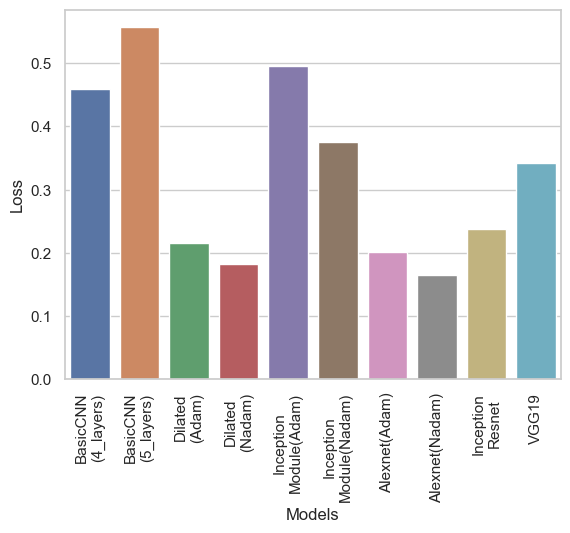

In [178]:
ax = sns.barplot(x=ml, y=losses)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xlabel('Models')
plt.ylabel('Loss')
plt.show()
